# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score

## Загрузка данных (2 балла)

Задание:

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на пять случайных строчек датасета:

In [ ]:
data.sample(n = 5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
672,60,79.05,4663.4,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
1813,34,85.35,2896.6,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,0
1654,3,55.30,196.15,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
3802,61,88.65,5321.25,Female,0,No,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
1236,1,45.30,45.3,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1


Посмотрим на уникальные значения каждой колонки нашего датасета:

In [ ]:
for i in feature_cols:
  print(f'{i}: {data[i].unique()}')

ClientPeriod: [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending: [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent: ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex: ['Male' 'Female']
IsSeniorCitizen: [0 1]
HasPartner: ['Yes' 'No']
HasChild: ['Yes' 'No']
HasPhoneService: ['Yes' 'No']
HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service']
HasInternetService: ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService: ['No internet service' 'No' 'Yes']
HasOnlineBackup: ['No internet service' 'No' 'Yes']
HasDeviceProtection: ['No internet service' 'No' 'Yes']
HasTechSupportAccess: ['No internet service' 'Yes' 'No']
HasOnlineTV: ['No internet service' 'No' 'Yes']
HasMovieSubscription: ['No internet service' 'No' 'Yes']
HasContractPhone: ['One year' 'Two year' 'Month-to-month']
IsBillin

Мы видим, что данные стоит обработать:


1.   TotalSpent имеет строковый тип данных, необходимо перевести в числовой, float
2.   Sex, HasPartner, HasChild, HasPhoneService, IsBillingPaperless можно легко перевести в числовые признаки, не задействуя one-hot encoding



In [ ]:
# изменим тип данных TotalSpent:
data.TotalSpent= pd.to_numeric(data.TotalSpent, errors='coerce')

# переведем колонки из пункта 2 в числовые признаки:
data = data.replace({'Sex': {'Female': 1, 'Male': 0}})
for i in ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']:
  data = data.replace({i: {'Yes': 1, 'No': 0}})

Посмотрим, есть ли в датасете NaNs (пропущенные значения):

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропущенных значений немного (9 штук), удалим их:

In [ ]:
data = data.dropna()

## Анализ данных (3 балла)

Задание:

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Гистограммы для численных признаков:

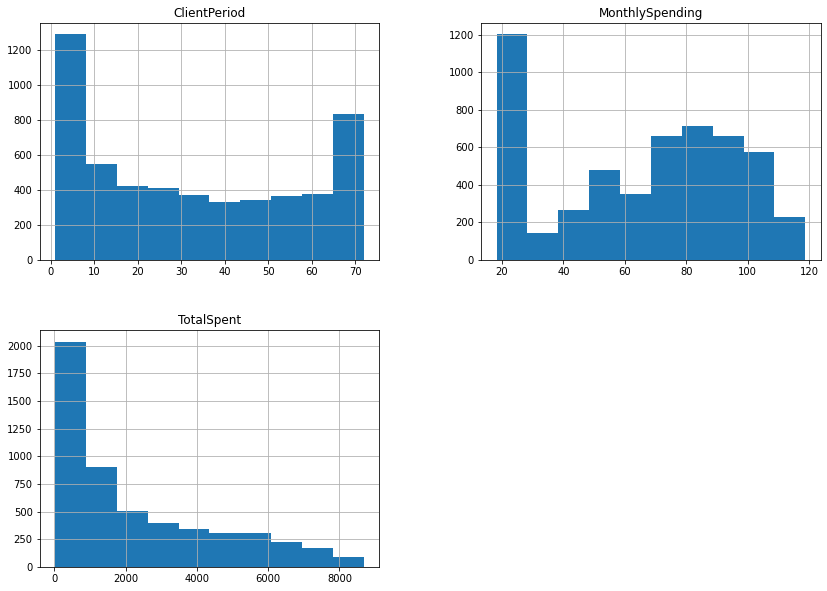

In [ ]:
data.hist(column=num_cols, figsize=(14, 10))
None

Столбчатые диаграммы для категориальных:

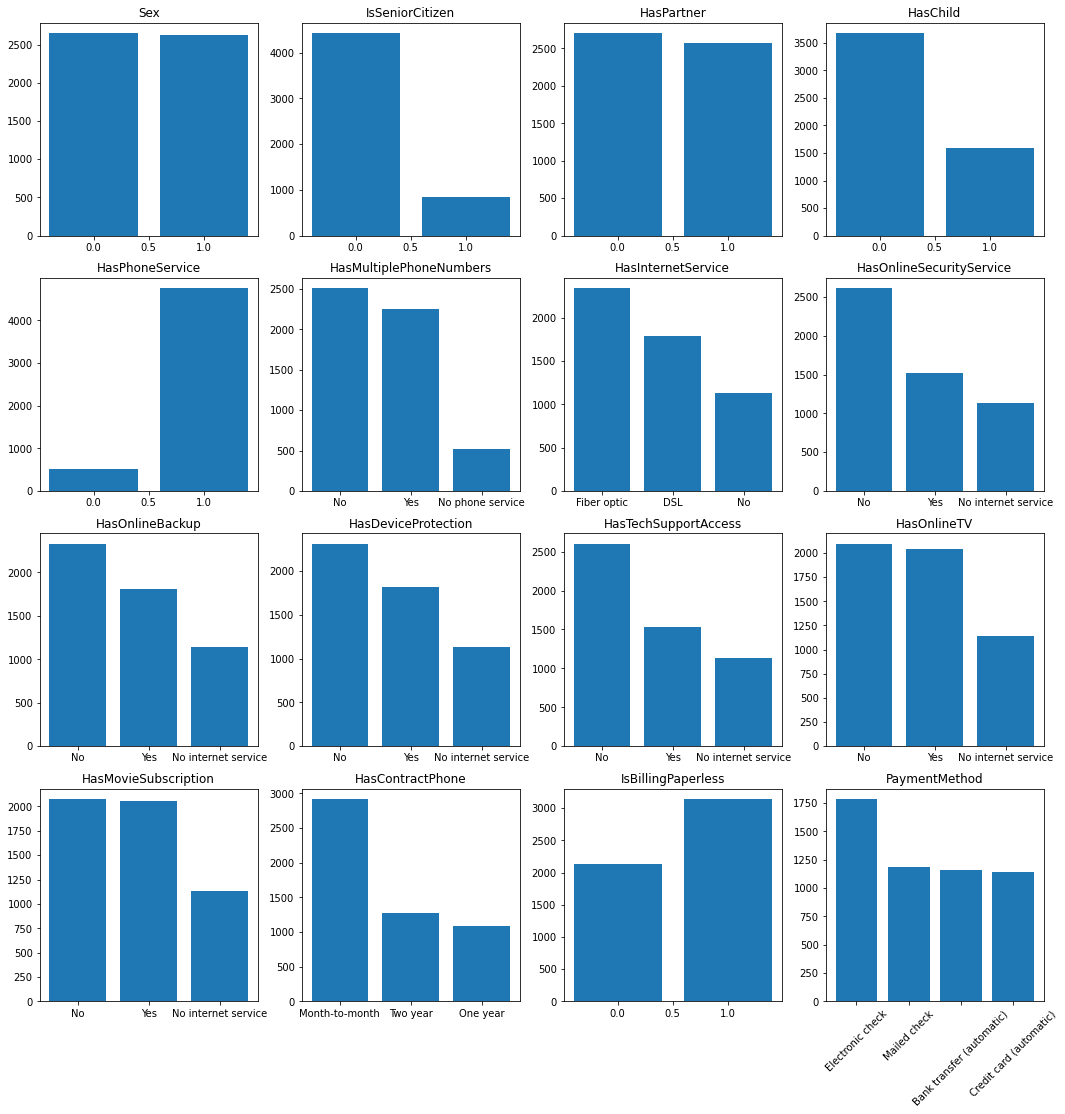

In [ ]:
grid = np.linspace(-12, 12, 500)
fig, ax = plt.subplots(4, 4, figsize=(18,18))
ax = ax.ravel()

for i, cat in enumerate(cat_cols):

    ax[i].set_title(cat)
    ax[i].bar(data[cat].value_counts().index,data[cat].value_counts())
    plt.xticks(rotation=45)

fig.show()


И посмотрим на распределение целевой переменной:

0    3889
1    1384
Name: Churn, dtype: int64


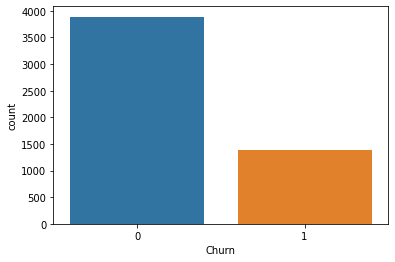

In [ ]:
sns.countplot(x='Churn', data=data)
print(data.Churn.value_counts())

Классы являются несбалансированными: объектов нулевого класса в 2.8 раз больше объектов первого.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Применим one-hot encoding к категориальным признакам. Нормализацию с помощью StandardScaler реализуем уже после разбиения на test/vaild, чтобы избежать утечки данных:

In [ ]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)

То, что мы сами перекодировали в 0 и 1 во втором шаге, останется неизменным, все хорошо:

In [ ]:
dummy_features.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,...,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,1,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


Поделим выборку на train/valid и применим StandardScaler:

In [ ]:
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y.values,
                                                    train_size=0.8,
                                                    random_state=42)
pca = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

Используем LogisticRegressionCV для подбора параметра:

In [ ]:
lr = LogisticRegressionCV(Cs = [100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc', refit=True)
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc')

Выведем лучший подобранный параметр и лучший roc_auc:

In [ ]:
print(lr.C_)
print(lr.scores_[1].max())

[10.]
0.8694171847808034


Обучим модель с этим параметром и посмотрим на метрику roc-auc на обучающей и валидационной выборках:

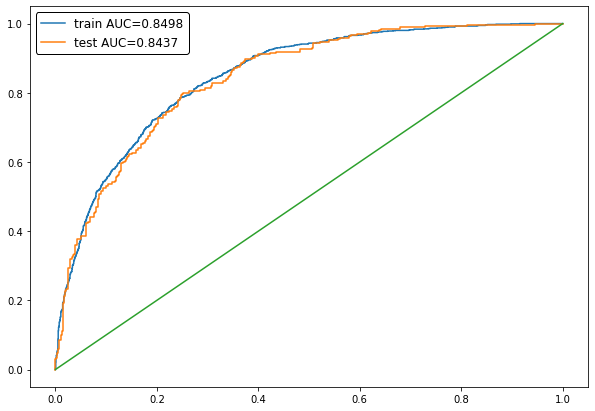

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

model = LogisticRegression(C=10.0, random_state=42)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

При параметре C = 10 AUC на обучающей и на тестовой выборке очень близки: 0.8498 и 0.8437, соответственно

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#!pip install catboost
import catboost

Разделим выборку и протестируем catboost со стандартными параметрами:

In [ ]:
X_origin = data.iloc[:, :-1]
y = data['Churn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_origin, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             random_state = 42,
                                             verbose=False)
boosting_model.fit(X_train1, y_train1)

y_train_predicted = boosting_model.predict_proba(X_train1)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test1)[:, 1]

Выведем AUC на тестовой и валидационной выборках:

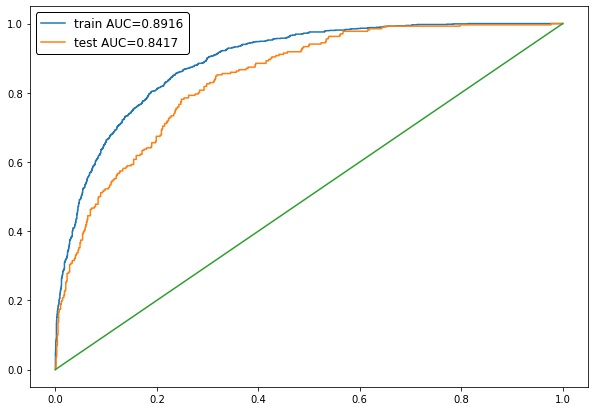

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

При стандартных параметрах (learning rate = 0.083), AUC для тестовой выборки составил 0.8916 для тестовой = 0.8417

Попробуем использовать grid_search для подбора лучшего значения параметров learning rate, depth (глубины деревьев) и l2_leaf_reg

In [ ]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             random_seed = 42,
                                             logging_level='Silent')

grid = {'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
        'depth': [3, 4, 5],
        'l2_leaf_reg': [3, 4, 5],
        'iterations' : [50, 100, 200, 300]}

gr = boosting_model.grid_search(grid,
                           X_train1,
                           y_train1,
                           refit=True,
                           verbose=False)

Grid_search подбрал такие параметры:

In [ ]:
print(gr['params'])

{'depth': 4, 'l2_leaf_reg': 4, 'iterations': 200, 'learning_rate': 0.1}


Построим модель с ними:

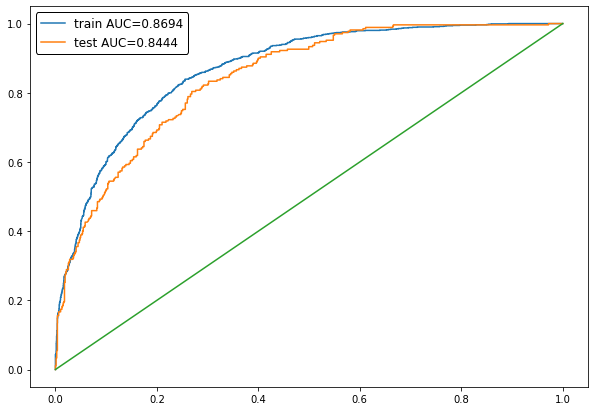

In [ ]:
boosting_model = catboost.CatBoostClassifier(iterations=200,
                                             cat_features=cat_cols,
                                             depth = 4,
                                             l2_leaf_reg = 4,
                                             learning_rate = 0.1,
                                             random_state = 42,
                                             silent = True)
boosting_model.fit(X_train1, y_train1)

y_train_predicted = boosting_model.predict_proba(X_train1)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test1)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()
None

AUC на обучающей выборке упал, но на тестовой вырос: с 0.8417 до 0.8444

# Предсказания

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов

Мой скор на kaggle: 0.85101